### Tentativa directional_manual

In [2]:
from __future__ import print_function
import healpy as hp
import math
import matplotlib.pyplot as plt
from copy import copy
import os
import numpy as np
import astropy.io.fits as pyfits

In [3]:
from pys2let import *

In [4]:
L = 3024
J_min = 3

In [5]:
Bs = np.array([2, 1.4, 1.2, 1.1])
L_transitions = np.array([200, 1100, 1900])
(
    hybrid_scal_l,
    hybrid_wav_l,
    hybrid_scal_bandlimit,
    hybrid_wav_bandlimits,
    J,
    L_bounds,
) = construct_hybrid_tiling(L, J_min, Bs, L_transitions)


Bs [2.  1.4 1.2 1.1]
L_bounds [   0  128  837 1764 3024]


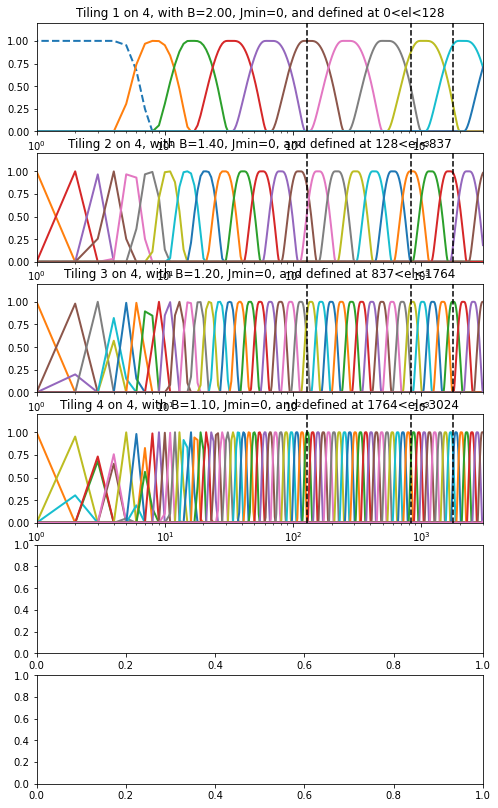

In [6]:
print("Bs", Bs)
print("L_bounds", L_bounds)
fig, axs = plt.subplots(Bs.size + 2, 1, figsize=(8, 14))
axs = axs.ravel()
J_mins = np.zeros((Bs.size,), dtype=np.int32)
J_mins[0] = J_min
for k in range(Bs.size):
    scal_l, wav_l = axisym_wav_l(Bs[k], L, J_mins[k])
    Jt = pys2let_j_max(Bs[k], L, 0)
    axs[k].plot(scal_l, lw=2, ls="dashed")
    for j in range(0, Jt + 1 - J_mins[k]):
        axs[k].plot(wav_l[:, j], lw=2, ls="solid")
    for kk in range(Bs.size):
        axs[k].axvline(L_bounds[kk], c="k", ls="dashed")
    axs[k].set_xscale("log")
    axs[k].set_ylim([0, 1.2])
    axs[k].set_xlim([1, L])
    axs[k].set_title(
        "Tiling %i" % (k + 1)
        + " on %i" % Bs.size
        + ", with B=%.2f" % Bs[k]
        + ", Jmin=0, and defined at %i" % L_bounds[k]
        + "<el<%i" % L_bounds[k + 1]
    )

In [7]:
for k in [Bs.size, Bs.size + 1]:
    axs[k].plot(hybrid_scal_l, lw=2, ls="dashed")
    for j in range(0, J + 1):
        axs[k].plot(hybrid_wav_l[:, j], lw=2, ls="solid")
    for kk in range(Bs.size):
        axs[k].axvline(L_bounds[kk], c="k", ls="dashed")
    axs[k].set_ylim([0, 1.2])
    axs[k].set_xlim([1, L])
    if k == Bs.size:
        axs[k].set_title("Hybrid tiling (log scale)")
        axs[k].set_xscale("log")
    else:
        axs[k].set_title("Hybrid tiling (linear scale)")
plt.tight_layout()
# plt.show()


<Figure size 432x288 with 0 Axes>

In [18]:
hybrid_wav_l = hybrid_wav_l.T.ravel()
res = verify_tiling(
    L, hybrid_scal_l, hybrid_wav_l, hybrid_scal_bandlimit, hybrid_wav_bandlimits
)
print("Is the tiling OK and giving an invertible wavelet transform?", res)
fig.savefig("Hybrid_tiling.png")
#plt.show()
# stop

Measured / given band-limits for scaling fct are 1 / 1
Measured / given band-limits for wavelet 0 are 4 / 4
Measured / given band-limits for wavelet 1 are 16 / 16
Measured / given band-limits for wavelet 2 are 64 / 64
Measured / given band-limits for wavelet 3 are 255 / 256
Measured / given band-limits for wavelet 4 are 256 / 256
Is the tiling OK and giving an invertible wavelet transform? True


In [9]:
J_min = 2
nside = 64
N = 3
spin = 0
Bs = np.array([4, 2])
J_min = 0
L_transitions = np.array([64])
L = 256
(
    hybrid_scal_l,
    hybrid_wav_l,
    hybrid_scal_bandlimit,
    hybrid_wav_bandlimits,
    J,
    L_bounds,
) = construct_hybrid_tiling(L, J_min, Bs, L_transitions)
hybrid_wav_l = hybrid_wav_l.T.ravel()
res = verify_tiling(
    L, hybrid_scal_l, hybrid_wav_l, hybrid_scal_bandlimit, hybrid_wav_bandlimits
)
print("Is the tiling OK and giving an invertible wavelet transform?", res)

Measured / given band-limits for scaling fct are 1 / 1
Measured / given band-limits for wavelet 0 are 4 / 4
Measured / given band-limits for wavelet 1 are 16 / 16
Measured / given band-limits for wavelet 2 are 64 / 64
Measured / given band-limits for wavelet 3 are 255 / 256
Measured / given band-limits for wavelet 4 are 256 / 256
Is the tiling OK and giving an invertible wavelet transform? True


In [10]:
# The filename of some arbitrary healpix map
fname = "/home/gasper_ju/s2let/data/somecmbsimu_hpx_128.fits"

#fname = os.path.join(
#    os.path.dirname("__file__"),
#    os.pardir,
#    os.pardir,
#    os.pardir,
#    "data",
#    "somecmbsimu_hpx_128.fits",
#)
fname

'/home/gasper_ju/s2let/data/somecmbsimu_hpx_128.fits'

In [11]:
os.path.isfile(fname)

True

In [15]:
f_ini = hp.read_map(fname)  # Initial map
f_lm = hp.map2alm(f_ini, lmax=L - 1)  # Its alms
f = hp.alm2map(f_lm, nside=nside, lmax=L - 1)  # Band limited version\
npix = hp.nside2npix(nside)
npix

49152

In [41]:
!pip install pytest

Defaulting to user installation because normal site-packages is not writeable


In [52]:
with pyfits.open(fname) as hdu:
       h = hdu

In [56]:
h[1].data

IndexError: HDU not found, possibly because the index is out of range, or because the file was closed before all HDUs were read

### axisym_hpx

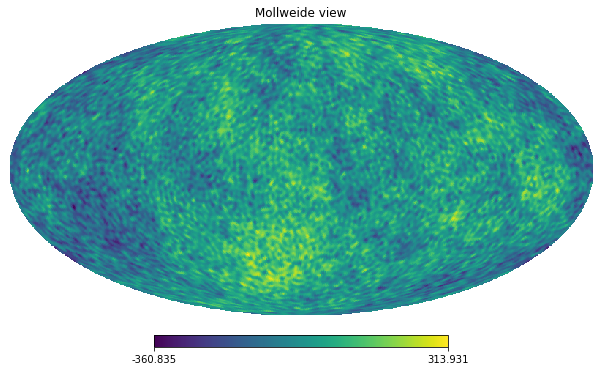

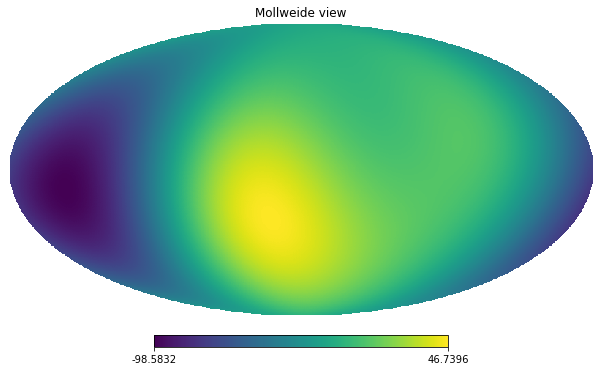

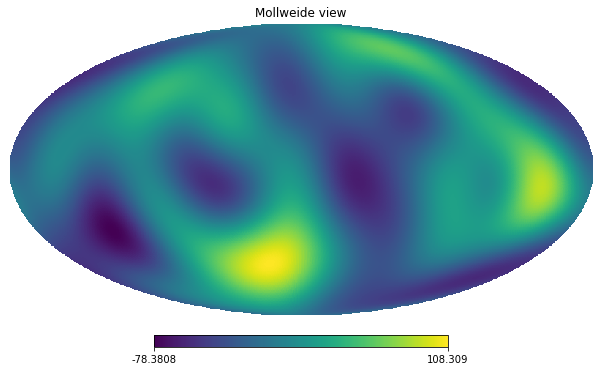

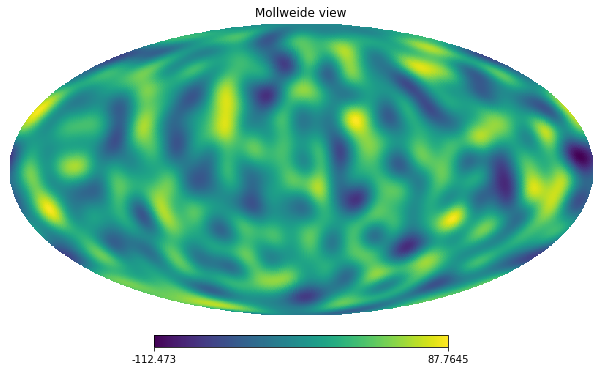

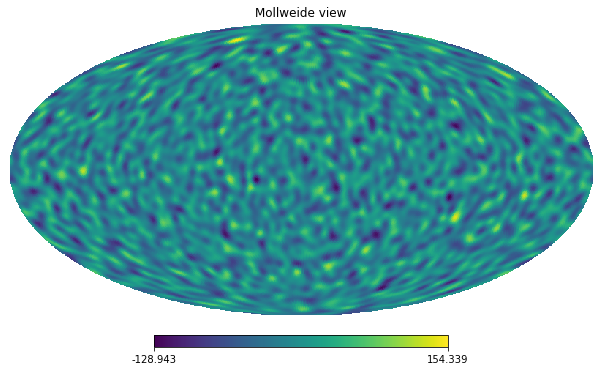

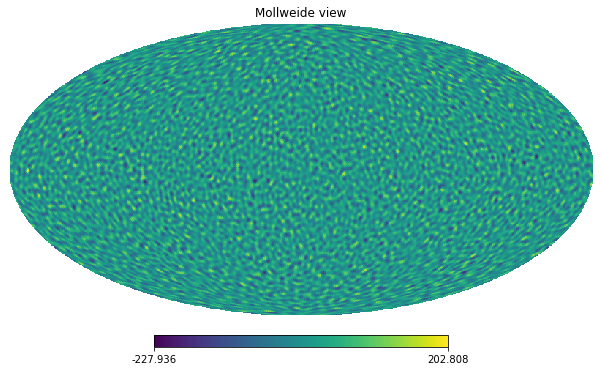

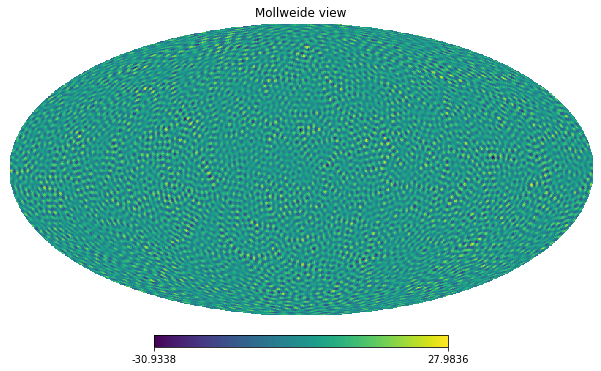

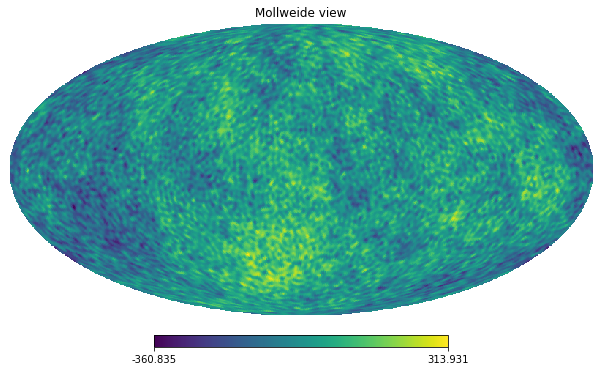

1

In [45]:
import healpy as hp
from pys2let import *
import math
import matplotlib.pyplot as plt
import os

nside = 128
L = 128
J_min = 1
B = 3
J = pys2let_j_max(B, L, J_min)

# The filename of some random healpix map
fname = "/home/gasper_ju/s2let/data/somecmbsimu_hpx_128.fits"
#fname = os.path.join(
#    os.path.dirname(__file__),
#    os.pardir,
#    os.pardir,
#    os.pardir,
#    "data",
#    "somecmbsimu_hpx_128.fits",
#)

# Read healpix map and compute alms.
# f_lm has size L*(L+1)/2
f_ini = hp.read_map(fname)  # Initial map
f_lm = hp.map2alm(f_ini, lmax=L - 1)  # Its alms
f = hp.alm2map(f_lm, nside=nside, lmax=L - 1)  # Band limited version

hp.mollview(f)

# Call pys2let and compute wavelet transform. Returns the harmonic coefficients of the wavelets.
# f_scal_lm has size L*(L+1)/2
# f_wav_lm has size L*(L+1)/2 by J-J_min+1
f_wav_lm, f_scal_lm = analysis_axisym_lm_wav(f_lm, B, L, J_min) 

# Reconstruct healpix maps on the sphere and plot them
f_scal = hp.alm2map(f_scal_lm, nside=nside, lmax=L - 1)
hp.mollview(f_scal)
f_wav = np.empty([12 * nside * nside, J - J_min + 1])
for j in range(J - J_min + 1):
    flm = f_wav_lm[:, j].ravel()
    f_wav[:, j] = hp.alm2map(flm, nside=nside, lmax=L - 1)
    hp.mollview(f_wav[:, j])

# Uses synthesis to reconstruct the input map.
f_lm_rec = synthesis_axisym_lm_wav(f_wav_lm, f_scal_lm, B, L, J_min)
f_rec = hp.alm2map(f_lm_rec, nside=nside, lmax=L - 1)
hp.mollview(f_rec)

plt.show()

In [47]:
pys2let_j_max?

Docstring: <no docstring>
Type:      builtin_function_or_method


In [60]:
np.shape(f_wav), np.shape(f_scal)

((196608, 5), (196608,))

In [58]:
hp.nside2npix(L) #NUMERO DE PIX PARA O L

196608

In [59]:
8256*6

49536

In [61]:
J

5

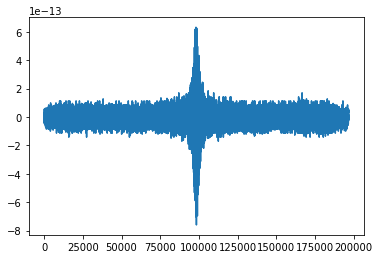

In [69]:
plt.plot(f-f_rec)
#plt.plot(f_rec, linestyle="dotted", color="yellow", linewidth=1)

In [72]:
hp.pix2ang( nside=L, ipix=100000, lonlat=True)

(292.5, -0.8952829865701233)

In [5]:
f = {"21cm": np.ones(10), "foregrounds": 2*np.ones(5)}

In [6]:
f.keys()

dict_keys(['21cm', 'foregrounds'])

In [7]:
f["21cm"]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [8]:
f["foregrounds"]

array([2., 2., 2., 2., 2.])